In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import PredictionErrorDisplay, mean_absolute_error, mean_squared_error, r2_score
import pickle

In [2]:
dataset_name = "new_elim"
model_name = "new_elim_gbr"

In [3]:
# read the dataset and seperate X & Y

df = pd.read_csv(f'{dataset_name}_car_dataset_preprocessed.csv')
Y = df[['price']]
X = df.drop(['price'], axis=1, inplace=True)

In [4]:
# down scale Y # 240,100,000 / 1000,000 = 240
scale_million = 1000000
Y = Y/scale_million

In [5]:
X

,prod_year,usage,tpi,city_ahvaz,city_isfahan,city_karaj,city_kermanshah,city_mashhad,city_qom,city_shiraz,...,engine_cond_needfix,engine_cond_replaced,front_chassis_colored,front_chassis_impact,front_chassis_intact,back_chassis_colored,back_chassis_impact,back_chassis_intact,gearbox_auto,gearbox_manual
0,1400,22000,3.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
1,1391,153000,4.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,1389,240000,4.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
3,1391,235000,6.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,1390,267000,9.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907,1397,68000,12.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
1908,1384,300000,12.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
1909,1396,37000,12.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
1910,1385,375000,12.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [6]:
# split dataset to train & test subsets
x_train,x_test, y_train,y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [8]:
def naive_roc_auc_score(y_true, y_pred):
    
  num_same_sign = 0
  num_pairs = 0
  
  for a in range(len(y_true)):
    for b in range(len(y_true)):
      if y_true[a] > y_true[b]:
        num_pairs += 1
        if y_pred[a] > y_pred[b]:
          num_same_sign += 1
        elif y_pred[a] == y_pred[b]:
          num_same_sign += .5
        
  return num_same_sign / num_pairs

In [54]:
def model_mesures(model):
    y_pred = model.predict(x_test)
    print('r2 score: ', r2_score(y_test, y_pred))
    print('mean_absolute_error: ', mean_absolute_error(y_test, y_pred))
    print('mean_squared_error: ', mean_squared_error(y_test, y_pred))
    # print('roc_auc_score: ', naive_roc_auc_score(y_test, y_pred))
    # print('AUC: ', auc(y_test, y_pred))

In [57]:
# train the Regression Tree

gbr = GradientBoostingRegressor(
    alpha=0.9,
    ccp_alpha=0.0,
    criterion='friedman_mse',
    init=None,
    learning_rate=0.1,
    loss='huber',
    max_depth=6,
    max_features=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=212,
    n_iter_no_change=None,
    random_state=123,
    subsample=1.0,
    tol=0.0001,
    validation_fraction=0.1,
    verbose=0,
    warm_start=False)
gbr.fit(x_train, y_train.values.ravel())

model_mesures(gbr)

r2 score:  0.9485918711543351
mean_absolute_error:  13.624453750649169
mean_squared_error:  535.0500886953898


In [69]:
dt = DecisionTreeRegressor(
    criterion='poisson',
    max_depth=6,
    random_state=123
)
dt.fit(x_train, y_train.values.ravel())

model_mesures(dt)

r2 score:  0.9138231977110347
mean_absolute_error:  20.200612648351385
mean_squared_error:  896.9185757883143


In [73]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train.values.ravel())

model_mesures(linear_reg)

r2 score:  0.9224981162133605
mean_absolute_error:  18.923184267484622
mean_squared_error:  806.6309886242452


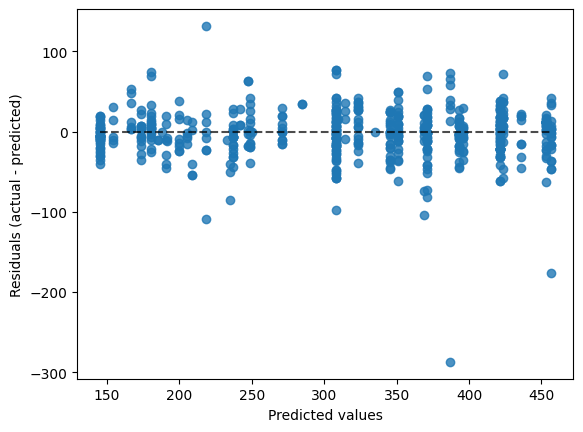

In [72]:
PredictionErrorDisplay.from_estimator(dt, x_test, y_test.values.ravel(), random_state=123)

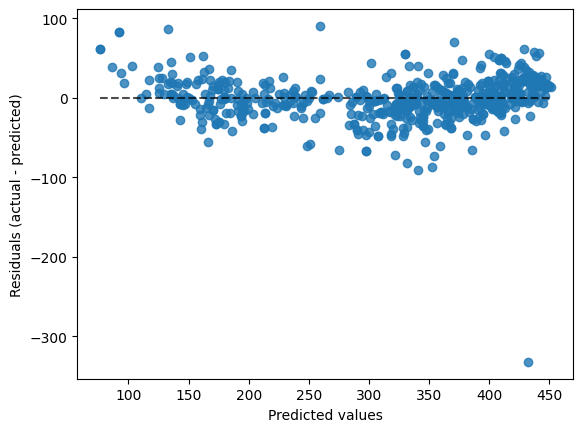

In [74]:
PredictionErrorDisplay.from_estimator(linear_reg, x_test, y_test.values.ravel(), random_state=123)

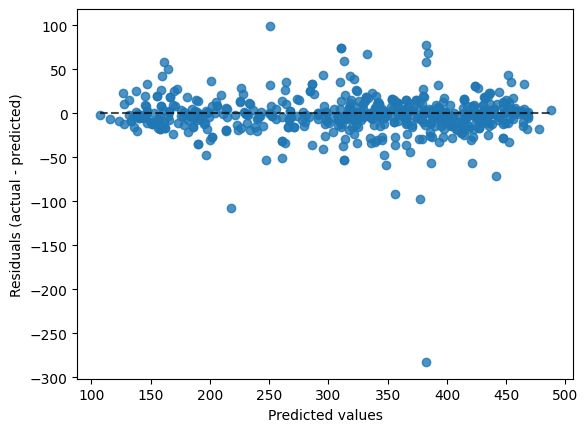

In [75]:
PredictionErrorDisplay.from_estimator(gbr, x_test, y_test.values.ravel(), random_state=123)

In [47]:
def get_aes(model):
    y_pred = model.predict(x_test)
    errors = list()
    for i in range(len(y_test)):
        # print(i)
        err = (y_pred[i] - y_test.iloc[i])
        # print(err)
        err_abs = abs(err)
        # print(err_abs)
        errors.append(err_abs)

    return errors, y_pred

In [ ]:
from matplotlib import pyplot

# calculate MAE for GradientBoostingRegressor
gbr_err, gbr_pred = get_aes(gbr)

# calculate MAE for DesicionTreeRegressor
dt_err, dt_pred = get_aes(dt)

# calculate MAE for LinearRegressor
linear_err, linear_pred = get_aes(linear_reg)


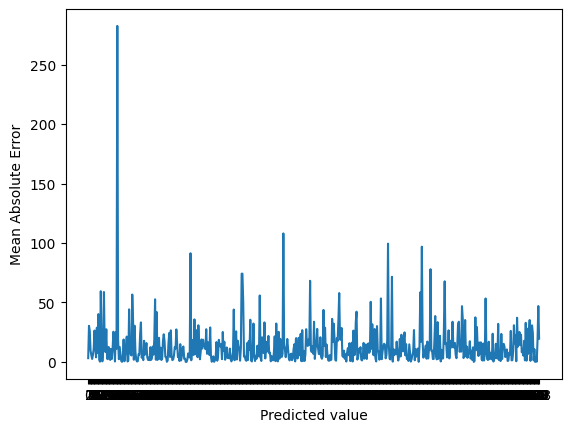

In [51]:
# Line Plot
pyplot.plot(gbr_err)
pyplot.xticks(ticks=[i for i in range(len(gbr_err))])
pyplot.xlabel('Predicted value')
pyplot.ylabel('Mean Absolute Error')
pyplot.show()

In [64]:
# saving the model
pickle.dump(reg, open(f'models/{model_name}_model.sav', 'wb'))

In [69]:
# deploying the model to sever and reload it
pickle.dump(gbr, open('./models/main_model.sav', 'wb'))
!pwd
!/usr/bin/rsync -vv ./models/main_model.sav incv:/home/incv/car-price-predictor/models/.
!curl -v car.vftg.xyz/reload

/home/vafian/Workspace/python/car-price-prediction-using-regression-tree
opening connection using: ssh incv rsync --server -vve.LsfxCIvu . /home/incv/car-price-predictor/models/.  (7 args)
delta-transmission enabled
main_model.sav
total: matches=1001  hash_hits=1001  false_alarms=0 data=0

sent 4,093 bytes  received 6,072 bytes  2,904.29 bytes/sec
total size is 1,000,756  speedup is 98.45
*   Trying 193.107.20.225:80...
* Connected to car.vftg.xyz (193.107.20.225) port 80 (#0)
> GET /reload HTTP/1.1
> Host: car.vftg.xyz
> User-Agent: curl/7.74.0
> Accept: */*
> 
* Mark bundle as not supporting multiuse
< HTTP/1.1 200 OK
< date: Tue, 03 Jan 2023 12:12:51 GMT
< server: uvicorn
< content-length: 2
< content-type: application/json
< 
* Connection #0 to host car.vftg.xyz left intact
{}